## Last homework
This week we will apply techniques learned during the semester as a recap of the learned methods. We will use a dataset from the paper "Hurricane-induced selection on the morphology of an island lizard", where body parameters of lizards are measured on an island before and after the hurricane. We will make binary predictions if a lizard was measured before of after the hurricane in the upcoming tasks.

When a task is not fully described, try to come up with a reasonable solution!

Data source: https://www.nature.com/articles/s41586-018-0352-3#Sec7

In [1]:
#import the nccessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import sklearn

#from sklearn.datasets import * 
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn import datasets, metrics
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import confusion_matrix, roc_curve,  accuracy_score, roc_auc_score
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_predict, train_test_split, cross_val_score, GridSearchCV

import seaborn as sns

import collections

### 1. Load & prepare data
 - load the provided dataset
 - look for missing values, handle them! Be careful! (You can screw up the whole assignment here)
 - We will make binary predictions if a lizard was before of after the hurricane in the upcoming tasks.
 - Convert all the features to numeric or binary features.
 - get rid of the ID column

In [2]:
#reading in the data

lizards_data = pd.read_csv("Donihue 2018-01-00672 Hurricanes Data.csv")
lizards_data.head()

,ID,Hurricane,Origin,Sex,SVL,Femur,Tibia,Metatarsal,LongestToe,Humerus,...,FingerArea2,FingerArea3,ToeArea1,ToeArea2,ToeArea3,MeanFingerArea,MeanToeArea,SumFingers,SumToes,MaxFingerForce
0,537,After,Pine Cay,Male,48.69,10.39,11.87,7.52,7.43,8.66,...,1.338,1.339,2.529,2.402,2.369,1.332667,2.433333,2.663,4.791,0.116
1,539,After,Pine Cay,Female,40.31,8.66,9.79,6.18,6.20,8.01,...,0.950,0.972,1.498,1.525,1.530,0.961333,1.517667,2.595,3.678,0.048
2,540,After,Pine Cay,Male,58.30,12.87,14.76,9.45,9.58,11.72,...,2.702,2.685,4.157,4.140,3.996,2.631333,4.097667,7.347,4.682,0.424
3,541,After,Pine Cay,Female,43.15,8.55,10.29,6.60,6.26,7.43,...,1.175,1.186,1.898,1.871,1.867,1.177667,1.878667,2.786,5.378,0.171
4,542,After,Pine Cay,Female,45.51,10.26,11.02,6.89,7.02,7.71,...,1.357,1.420,2.627,2.435,2.529,1.384333,2.530333,3.575,6.646,0.014


In [3]:
#dropping the ID column

lizards_data_modif = lizards_data.drop(columns = ['ID'])
lizards_data_modif.head()

,Hurricane,Origin,Sex,SVL,Femur,Tibia,Metatarsal,LongestToe,Humerus,Radius,...,FingerArea2,FingerArea3,ToeArea1,ToeArea2,ToeArea3,MeanFingerArea,MeanToeArea,SumFingers,SumToes,MaxFingerForce
0,After,Pine Cay,Male,48.69,10.39,11.87,7.52,7.43,8.66,7.99,...,1.338,1.339,2.529,2.402,2.369,1.332667,2.433333,2.663,4.791,0.116
1,After,Pine Cay,Female,40.31,8.66,9.79,6.18,6.20,8.01,6.51,...,0.950,0.972,1.498,1.525,1.530,0.961333,1.517667,2.595,3.678,0.048
2,After,Pine Cay,Male,58.30,12.87,14.76,9.45,9.58,11.72,9.54,...,2.702,2.685,4.157,4.140,3.996,2.631333,4.097667,7.347,4.682,0.424
3,After,Pine Cay,Female,43.15,8.55,10.29,6.60,6.26,7.43,6.60,...,1.175,1.186,1.898,1.871,1.867,1.177667,1.878667,2.786,5.378,0.171
4,After,Pine Cay,Female,45.51,10.26,11.02,6.89,7.02,7.71,7.25,...,1.357,1.420,2.627,2.435,2.529,1.384333,2.530333,3.575,6.646,0.014


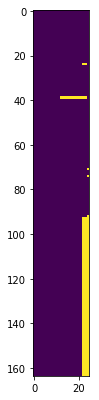

In [4]:
#checking the missing values

plt.figure(figsize=(1,10))
plt.imshow(lizards_data_modif.isna())
plt.show()

After observing the dataset, I realised that three valeus are missing for all the lizards which were observed before the storm. Since these are only informative by the lizards which were observed after the storm, these three features can be eliminated.

In [5]:
#removing the three features

lizards_data_modif = lizards_data_modif.drop(columns = ['SumFingers', 'SumToes', 'MaxFingerForce'])
lizards_data_modif.head()

,Hurricane,Origin,Sex,SVL,Femur,Tibia,Metatarsal,LongestToe,Humerus,Radius,...,FingerCount,ToeCount,FingerArea1,FingerArea2,FingerArea3,ToeArea1,ToeArea2,ToeArea3,MeanFingerArea,MeanToeArea
0,After,Pine Cay,Male,48.69,10.39,11.87,7.52,7.43,8.66,7.99,...,10.0,12.0,1.321,1.338,1.339,2.529,2.402,2.369,1.332667,2.433333
1,After,Pine Cay,Female,40.31,8.66,9.79,6.18,6.20,8.01,6.51,...,10.0,13.0,0.962,0.950,0.972,1.498,1.525,1.530,0.961333,1.517667
2,After,Pine Cay,Male,58.30,12.87,14.76,9.45,9.58,11.72,9.54,...,14.0,15.0,2.507,2.702,2.685,4.157,4.140,3.996,2.631333,4.097667
3,After,Pine Cay,Female,43.15,8.55,10.29,6.60,6.26,7.43,6.60,...,11.0,12.0,1.172,1.175,1.186,1.898,1.871,1.867,1.177667,1.878667
4,After,Pine Cay,Female,45.51,10.26,11.02,6.89,7.02,7.71,7.25,...,11.0,13.0,1.376,1.357,1.420,2.627,2.435,2.529,1.384333,2.530333


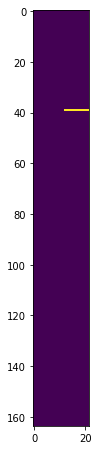

In [6]:
#checking the missing values

plt.figure(figsize=(1,10))
plt.imshow(lizards_data_modif.isna())
plt.show()

Since there is one more row which has missing values, let's remove this too!

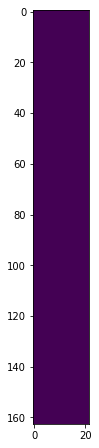

In [7]:
#removing the 39th row

lizards_data_modif = lizards_data_modif.drop([39])

#checking the missing values

plt.figure(figsize=(1,10))
plt.imshow(lizards_data_modif.isna())
plt.show()

In [8]:
#checking the locations 

collections.Counter(lizards_data_modif['Origin'])

Counter({'Pine Cay': 78, 'Water Cay': 85})

In [9]:
#replacing the hurricane, sex and origin features with numeric values

lizards_data_num = lizards_data_modif.replace('After', 1)
lizards_data_num = lizards_data_num .replace('Before', 0)

lizards_data_num = lizards_data_num.replace('Female', 0)
lizards_data_num = lizards_data_num .replace('Male', 1)

lizards_data_num = lizards_data_num.replace('Pine Cay', 0)
lizards_data_num = lizards_data_num .replace('Water Cay', 1)

lizards_data_num.head()

,Hurricane,Origin,Sex,SVL,Femur,Tibia,Metatarsal,LongestToe,Humerus,Radius,...,FingerCount,ToeCount,FingerArea1,FingerArea2,FingerArea3,ToeArea1,ToeArea2,ToeArea3,MeanFingerArea,MeanToeArea
0,1,0,1,48.69,10.39,11.87,7.52,7.43,8.66,7.99,...,10.0,12.0,1.321,1.338,1.339,2.529,2.402,2.369,1.332667,2.433333
1,1,0,0,40.31,8.66,9.79,6.18,6.20,8.01,6.51,...,10.0,13.0,0.962,0.950,0.972,1.498,1.525,1.530,0.961333,1.517667
2,1,0,1,58.30,12.87,14.76,9.45,9.58,11.72,9.54,...,14.0,15.0,2.507,2.702,2.685,4.157,4.140,3.996,2.631333,4.097667
3,1,0,0,43.15,8.55,10.29,6.60,6.26,7.43,6.60,...,11.0,12.0,1.172,1.175,1.186,1.898,1.871,1.867,1.177667,1.878667
4,1,0,0,45.51,10.26,11.02,6.89,7.02,7.71,7.25,...,11.0,13.0,1.376,1.357,1.420,2.627,2.435,2.529,1.384333,2.530333


### 2. T-SNE
 - embed the data points into a 2D space via T-SNE (preprocess the data if needed). For embedding, use only the numerical features (So do not use Sex, Hurricane and Origin features)
 - what is common in the clusters that we got? visualize the embedded points by using different colour for the different fetautre values (eg on a plot show the female gekkos with red and the male ones with blue). Explore at least 4 features! Do we get separation by the Hurricane variable?

In [10]:
#removing the unnecessary values 

lizards_tsne = lizards_data_num.drop(columns = ['Hurricane', 'Origin', 'Sex'])
lizards_tsne.head()

,SVL,Femur,Tibia,Metatarsal,LongestToe,Humerus,Radius,Metacarpal,LongestFinger,FingerCount,ToeCount,FingerArea1,FingerArea2,FingerArea3,ToeArea1,ToeArea2,ToeArea3,MeanFingerArea,MeanToeArea
0,48.69,10.39,11.87,7.52,7.43,8.66,7.99,2.22,3.19,10.0,12.0,1.321,1.338,1.339,2.529,2.402,2.369,1.332667,2.433333
1,40.31,8.66,9.79,6.18,6.20,8.01,6.51,2.38,3.55,10.0,13.0,0.962,0.950,0.972,1.498,1.525,1.530,0.961333,1.517667
2,58.30,12.87,14.76,9.45,9.58,11.72,9.54,3.54,5.09,14.0,15.0,2.507,2.702,2.685,4.157,4.140,3.996,2.631333,4.097667
3,43.15,8.55,10.29,6.60,6.26,7.43,6.60,2.79,3.55,11.0,12.0,1.172,1.175,1.186,1.898,1.871,1.867,1.177667,1.878667
4,45.51,10.26,11.02,6.89,7.02,7.71,7.25,2.52,3.37,11.0,13.0,1.376,1.357,1.420,2.627,2.435,2.529,1.384333,2.530333


In [11]:
#scaling the data

lizards_scaled = (lizards_tsne-lizards_tsne.mean())/lizards_tsne.std()

#performin T-SNE on the already scaled dataset

tsne = TSNE(n_components = 2, random_state = 42)
embedded = tsne.fit_transform(lizards_scaled)

/opt/conda/lib/python3.6/site-packages/sklearn/neighbors/base.py:371: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


In [12]:
#creating some lists according to the features for the plots

male_female_list = list(lizards_data_modif['Sex'])

hurricane_list = list(lizards_data_modif['Hurricane'])

origin_list = list(lizards_data_modif['Origin'])

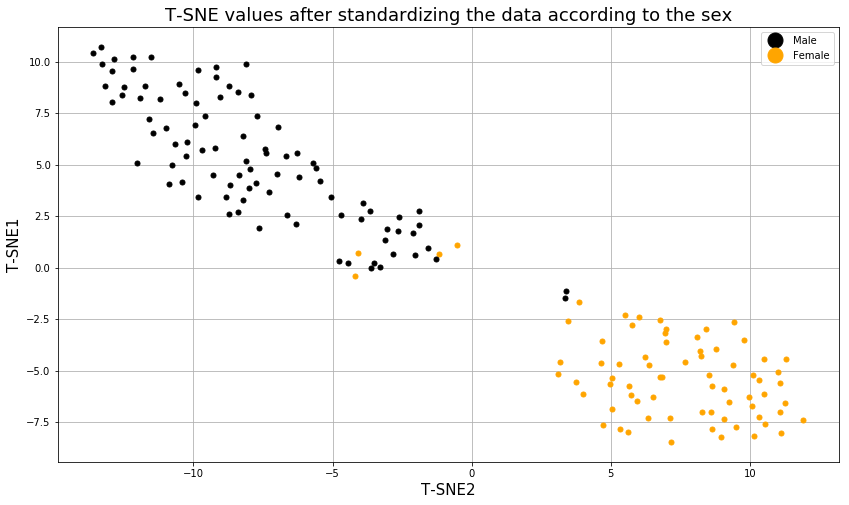

In [13]:
#let's plot the result of the T-SNE

plt.figure(figsize=(14,8))
plt.title('T-SNE values after standardizing the data according to the sex', fontsize = 18)

for i in range(0,len(embedded)):
    if male_female_list[i] == 'Female':
        plt.plot(embedded[i][0], embedded[i][1], 'o', color = 'orange', markersize = 5)
    else:
        plt.plot(embedded[i][0], embedded[i][1], 'o', color = 'black', markersize = 5)
        
custom_lines = [Line2D([0], [0], marker='o', color='black', lw=0, markersize=15),
                Line2D([0], [0], marker='o', color='orange', lw=0, markersize=15)]


plt.legend(custom_lines, ['Male', 'Female'])


plt.ylabel('T-SNE1', fontsize = 15)
plt.xlabel('T-SNE2', fontsize = 15)
plt.grid() 
plt.show()

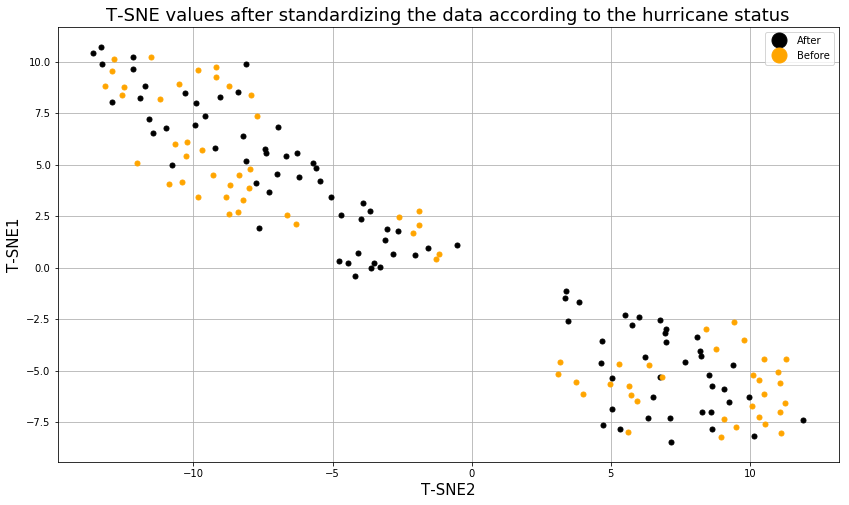

In [14]:
#let's plot the result of the T-SNE

plt.figure(figsize=(14,8))
plt.title('T-SNE values after standardizing the data according to the hurricane status', fontsize = 18)

for i in range(0,len(embedded)):
    if hurricane_list[i] == 'Before':
        plt.plot(embedded[i][0], embedded[i][1], 'o', color = 'orange', markersize = 5)
    else:
        plt.plot(embedded[i][0], embedded[i][1], 'o', color = 'black', markersize = 5)
        
custom_lines = [Line2D([0], [0], marker='o', color='black', lw=0, markersize=15),
                Line2D([0], [0], marker='o', color='orange', lw=0, markersize=15)]


plt.legend(custom_lines, ['After', 'Before'])


plt.ylabel('T-SNE1', fontsize = 15)
plt.xlabel('T-SNE2', fontsize = 15)
plt.grid() 
plt.show()

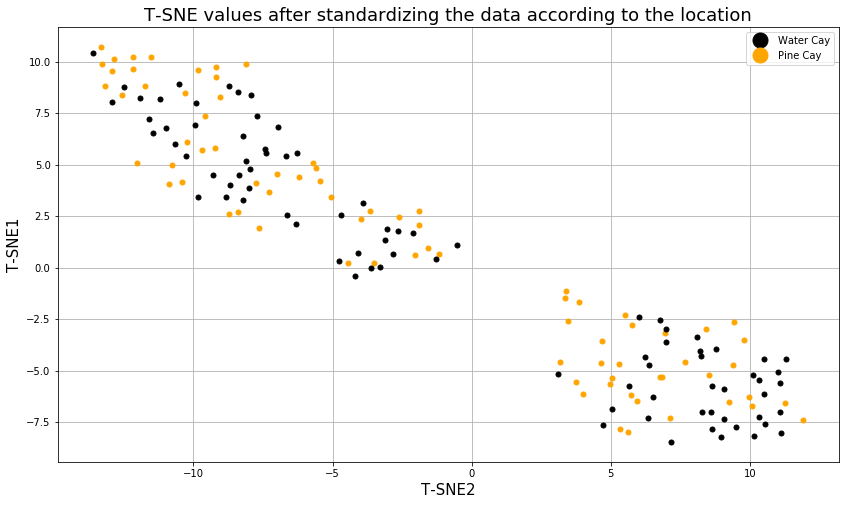

In [15]:
#let's plot the result of the T-SNE

plt.figure(figsize=(14,8))
plt.title('T-SNE values after standardizing the data according to the location', fontsize = 18)

for i in range(0,len(embedded)):
    if origin_list[i] == 'Pine Cay':
        plt.plot(embedded[i][0], embedded[i][1], 'o', color = 'orange', markersize = 5)
    else:
        plt.plot(embedded[i][0], embedded[i][1], 'o', color = 'black', markersize = 5)
        
custom_lines = [Line2D([0], [0], marker='o', color='black', lw=0, markersize=15),
                Line2D([0], [0], marker='o', color='orange', lw=0, markersize=15)]


plt.legend(custom_lines, ['Water Cay', 'Pine Cay'])


plt.ylabel('T-SNE1', fontsize = 15)
plt.xlabel('T-SNE2', fontsize = 15)
plt.grid() 
plt.show()

Conclusions of these plots: We get a significant separation according to the sex factor, however we do not get any kind of obvious separation according to the other two factors (origin and hurricane situation).

### 3. Linear model + fine-tune
 - train and generate predictions with a logistic regression model using 5 fold cross validation
 - fine-tune the regularization strength for L2 regularization type!
 - show the ROC curve with the AUC value for the best model that you have found

In [16]:
#transforming the values to numpy array

lizards_scaled_np = lizards_scaled.to_numpy()
lizars_scaled_list = list(lizards_scaled_np)

#appending back the binary values

lizars_scaled_list.append(np.array(lizards_data_num['Sex']))
lizars_scaled_list.append(np.array(lizards_data_num['Origin']))

#getting the hurricane to a list

hurricane_list = list(lizards_data_num['Hurricane'])

In [17]:
#using logistic regression with 5 fold cross validation:

logreg = LogisticRegression()
pred_lg = cross_val_predict(logreg, lizards_scaled_np, hurricane_list, cv=5, method='predict_proba')
scores_lg = cross_val_score(logreg, lizards_scaled_np, hurricane_list, cv=5)
scores_lg

array([0.76470588, 0.93939394, 0.75      , 0.84375   , 0.875     ])

In [18]:
print('The accuracy:', round(scores_lg.mean(),2), '+/-', round(scores_lg.std()*2,2))

The accuracy: 0.83 +/- 0.14


In [19]:
#creating a list with c values

C_values = np.linspace(1e-2, 10.0, 1000)

params = {'C': C_values}

#creating the model

logreg_tune = LogisticRegression(penalty = 'l2')

#gridsearch

clf = GridSearchCV(logreg_tune, params, cv = 5, scoring = 'accuracy', return_train_score = False)

#fitting

clf.fit(lizards_scaled_np, hurricane_list)

#getting the best parameter set

print('The best parameter for C is:', clf.best_params_)

The best parameter for C is: {'C': 2.15}


In [20]:
#creating the logistic regression model with the appropriate parameters

logreg_best = LogisticRegression(penalty = 'l2', C = clf.best_params_['C'])

#creating the predictions

preds_logreg = cross_val_predict(logreg_best, lizards_scaled_np, hurricane_list, cv = 5, method = 'predict_proba')

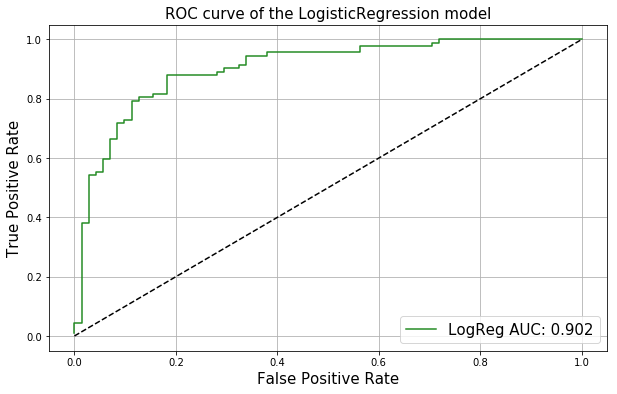

In [21]:
fpr_rf, tpr_rf, _ = roc_curve(y_score=np.array(preds_logreg).T[1], y_true=hurricane_list)

#plotting the ROC curve

plt.figure(figsize=(10, 6))

plt.plot(fpr_rf, tpr_rf, color = 'forestgreen', label='LogReg AUC: ' + str(np.round(roc_auc_score(y_score=np.array(preds_logreg).T[1], y_true=hurricane_list), 3)))

plt.plot([0, 1], [0, 1], '--', color = 'black')

plt.legend(fontsize=15)
plt.title('ROC curve of the LogisticRegression model', fontsize = 15)
plt.xlabel('False Positive Rate', fontsize = 15)
plt.ylabel('True Positive Rate', fontsize = 15)
plt.grid()
plt.show()

As it's seen, the AUC score is quite high!

### 4. SVM + fine-tune
 - train and generate predictions with an SVM model using 5 fold cross validation
 - fine-tune the kernel parameters for 2 selected kernels
 - show the ROC curve with the AUC value for the best model that you have found

In [22]:
#using logistic regression with 5 fold cross validation:

model_svc = SVC(probability=True)
pred_svc = cross_val_predict(model_svc, lizards_scaled_np, hurricane_list, cv=5, method='predict_proba')
scores_svc = cross_val_score(model_svc, lizards_scaled_np, hurricane_list, cv=5)
scores_svc

array([0.82352941, 0.84848485, 0.8125    , 0.78125   , 0.875     ])

In [23]:
print('The accuracy:', round(scores_svc.mean(),2), '+/-', round(scores_svc.std()*2,2))

The accuracy: 0.83 +/- 0.06


As it's seen, the std is much smaller than by the case of the LogisticRegression!

In [24]:
#creating a list with c values

C_values = np.linspace(1e-2, 10.0, 1000)
shrinking = [True, False]  

params = {'C': C_values, 'shrinking': shrinking}

#creating the model

model_svc_tune = SVC(kernel = 'linear', random_state = 42, probability = True )

#gridsearch

clf = GridSearchCV(model_svc_tune, params, cv = 5, scoring = 'accuracy', return_train_score = False)

#fitting

clf.fit(lizards_scaled_np, hurricane_list)

#getting the best parameter set

print('The best parameters are:', clf.best_params_)

The best parameters are: {'C': 0.18000000000000002, 'shrinking': True}


In [25]:
#creating the SVC model with the appropriate parameters

svc_best = SVC(kernel = 'linear', random_state = 42, probability = True,C = clf.best_params_['C'], shrinking = clf.best_params_['shrinking'])

#creating the predictions

preds_svc = cross_val_predict(svc_best, lizards_scaled_np, hurricane_list, cv = 5, method = 'predict_proba')

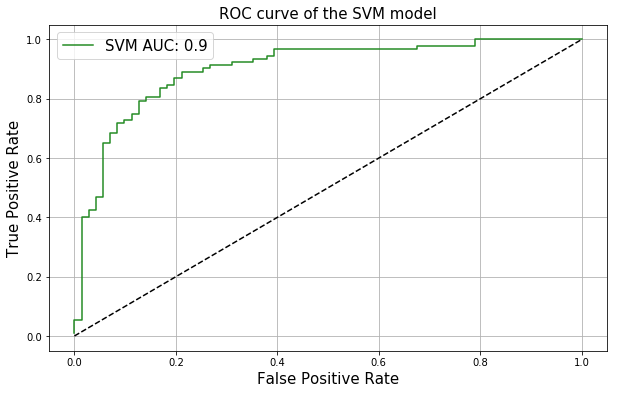

In [26]:
fpr_rf, tpr_rf, _ = roc_curve(y_score=np.array(preds_svc).T[1], y_true=hurricane_list)

#plotting the ROC curve

plt.figure(figsize=(10, 6))

plt.plot(fpr_rf, tpr_rf, color = 'forestgreen', label='SVM AUC: ' + str(np.round(roc_auc_score(y_score=np.array(preds_svc).T[1], y_true=hurricane_list), 3)))

plt.plot([0, 1], [0, 1], '--', color = 'black')

plt.legend(fontsize=15)
plt.title('ROC curve of the SVM model', fontsize = 15)
plt.xlabel('False Positive Rate', fontsize = 15)
plt.ylabel('True Positive Rate', fontsize = 15)
plt.grid()
plt.show()

As it's seen, the AUC score is quite high in this case also!

### 5. RF + feature importances
 - train and generate predictions with a random forest classifier model using leave 5 fold cross validation
 - show the ROC curve with the AUC value for the best model that you have found
 - train a random forest model on all the data and show the 5 most important features based on feature importances of the model

In [27]:
#using logistic regression with 5 fold cross validation:

rf = RandomForestClassifier()
pred_rf = cross_val_predict(rf, lizards_scaled_np, hurricane_list, cv=5, method='predict_proba')
scores_rf = cross_val_score(rf, lizards_scaled_np, hurricane_list, cv=5)
scores_rf

array([0.61764706, 0.66666667, 0.71875   , 0.59375   , 0.8125    ])

In [28]:
print('The accuracy:', round(scores_rf.mean(),2), '+/-', round(scores_rf.std()*2,2))

The accuracy: 0.68 +/- 0.16


As it's seen, this is a much worse model than the previous ones. Let's fine tune the model!

In [29]:
#creating a list with the tunable values

n_estimators =  [10, 50, 100,200,300]
criterion = ["gini", "entropy"]

params = {'n_estimators': n_estimators, 'criterion': criterion}

#creating the model

rf_tune = RandomForestClassifier(random_state = 42)

#creating the gridsearch

clf = GridSearchCV(rf_tune, params, cv = 5, scoring = 'accuracy', return_train_score = False)

#fitting

clf.fit(lizards_scaled_np, hurricane_list)

#getting the best parameter set

print('The best parameters are:', clf.best_params_)

The best parameters are: {'criterion': 'gini', 'n_estimators': 200}


In [30]:
#creating the rf model with the appropriate parameters

rf_best_params = RandomForestClassifier(random_state = 42, n_estimators = clf.best_params_['n_estimators'], criterion = clf.best_params_['criterion'])

#creating the predictions

preds_rf = cross_val_predict(rf_best_params, lizards_scaled_np, hurricane_list, cv = 5, method = 'predict_proba')

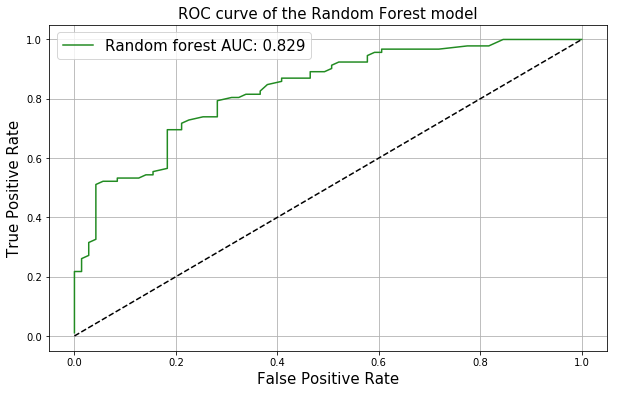

In [31]:
fpr_rf, tpr_rf, _ = roc_curve(y_score=np.array(preds_rf).T[1], y_true=hurricane_list)

#plotting the ROC curve

plt.figure(figsize=(10, 6))

plt.plot(fpr_rf, tpr_rf, color = 'forestgreen', label='Random forest AUC: ' + str(np.round(roc_auc_score(y_score=np.array(preds_rf).T[1], y_true=hurricane_list), 3)))

plt.plot([0, 1], [0, 1], '--', color = 'black')

plt.legend(fontsize=15)
plt.title('ROC curve of the Random Forest model', fontsize = 15)
plt.xlabel('False Positive Rate', fontsize = 15)
plt.ylabel('True Positive Rate', fontsize = 15)
plt.grid()
plt.show()

In [32]:
#random forest and importances

rf_best_params.fit(lizards_scaled_np, hurricane_list)

importances = rf_best_params.feature_importances_

In [33]:
#creating a list of column names

list_of_column_names = list(lizards_tsne.columns)
list_of_column_names.append('Sex')
list_of_column_names.append('Origin')

#getting the indices from the importances

indices = np.argsort(importances)[::-1]

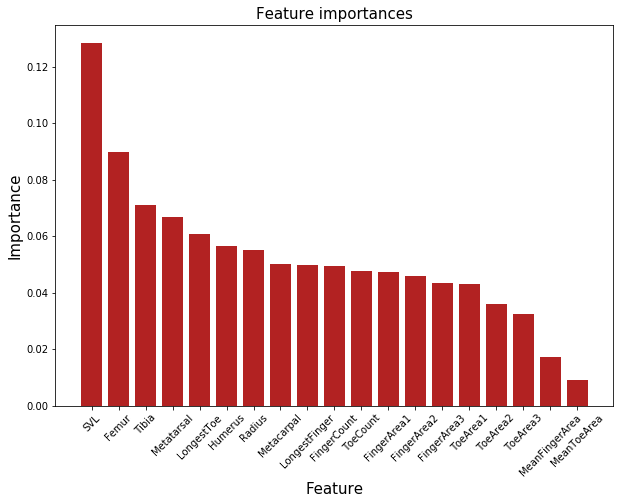

In [34]:
#plotting the barchart

plt.figure(figsize = (10,7))

plt.bar(range(lizards_scaled_np.shape[1]), importances[indices], color="firebrick", align="center")
plt.xticks(range(lizards_scaled_np.shape[1]), list_of_column_names, rotation=45)

plt.title("Feature importances", fontsize = 15)
plt.ylabel('Importance', fontsize = 15)
plt.xlabel('Feature', fontsize = 15)

plt.show()